In [77]:

"""
Created on Tue, Mar 31 01:11:11 2020
@author: Yaniv Maimon
"""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#from plotly.offline import download_plotlyjs,iplot,plot
sns.set_context('poster',0.6)

In [78]:
df = pd.read_csv('911.csv')


In [79]:
df = pd.DataFrame(df)

#additional commands
df.info()
df['zip'].value_counts().head(5)
df['twp'].value_counts().head(5)
df['title'].nunique()

#initialize 'reason' column
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

df['reason'].value_counts()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

In [80]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire


<AxesSubplot:xlabel='reason', ylabel='count'>

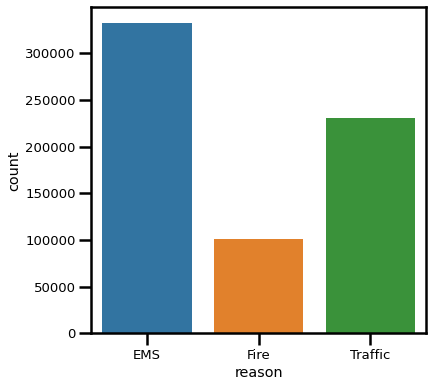

In [81]:

#reason dist.
plt.figure(figsize= (6,6))
sns.countplot(x='reason',data=df)

In [82]:



#converting timeStamp to date time
df['timeStamp'] = df['timeStamp'].apply(lambda x : pd.to_datetime(x))

#extracting date details as additional columns
df['hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['month'] = df['timeStamp'].apply(lambda x : x.month)
df['day of month'] = df['timeStamp'].apply(lambda x : x.day)

#creating day of week from dayOfMonth
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week'] = df['timeStamp'].apply(lambda x:dmap[x.dayofweek])


<AxesSubplot:xlabel='day of week', ylabel='count'>

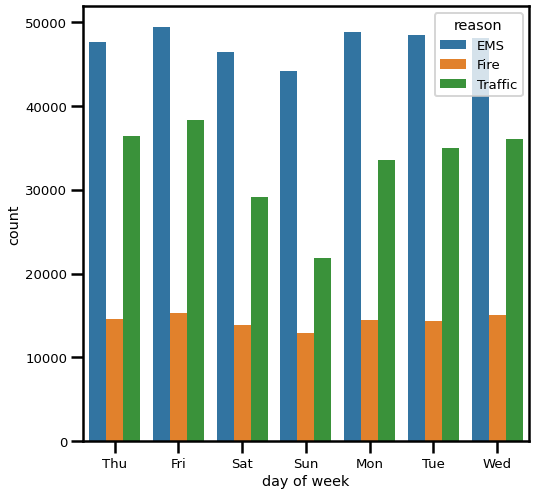

In [83]:
#'reason' countplot for [day ,month]
plt.figure(figsize= (8,8))
sns.countplot(x = df['day of week'], hue = df['reason'])

<AxesSubplot:xlabel='month', ylabel='count'>

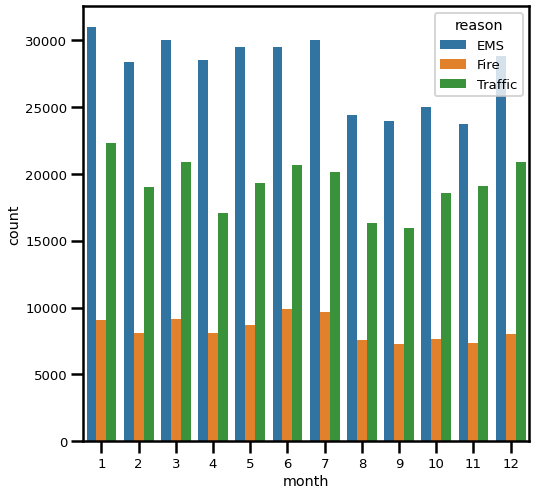

In [84]:
plt.figure(figsize= (8,8))
sns.countplot(x = df['month'], hue = df['reason'])

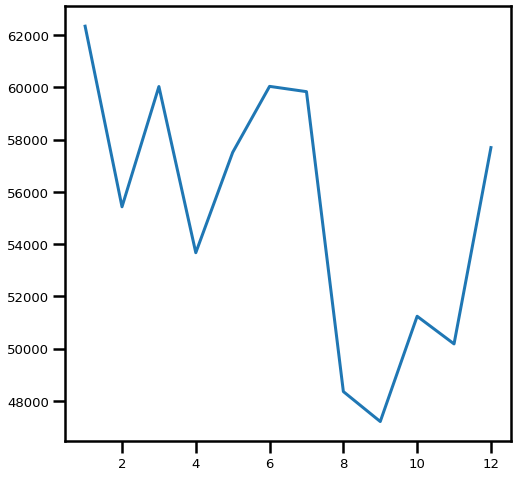

In [85]:
#groupby 'month'
byMonth  = df.groupby('month').count()
plt.figure(figsize= (8,8))
plt.plot(byMonth['lat'])

In [86]:
#initializg date column
df['date'] = df['timeStamp'].apply(lambda x:x.date())


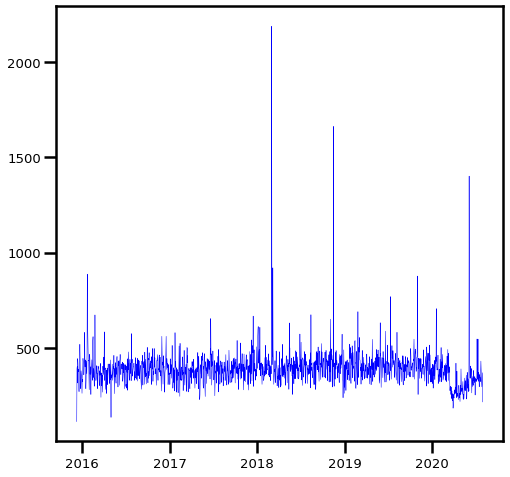

In [87]:
#groupby   'date'
byDate = df.groupby('date').count()
plt.figure(figsize= (8,8))
plt.plot(byDate['lat'],'b',lw=0.5)

In [88]:
#liniar model
byMonth.reset_index(inplace = True)


/home/maimon/.local/lib/python3.9/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


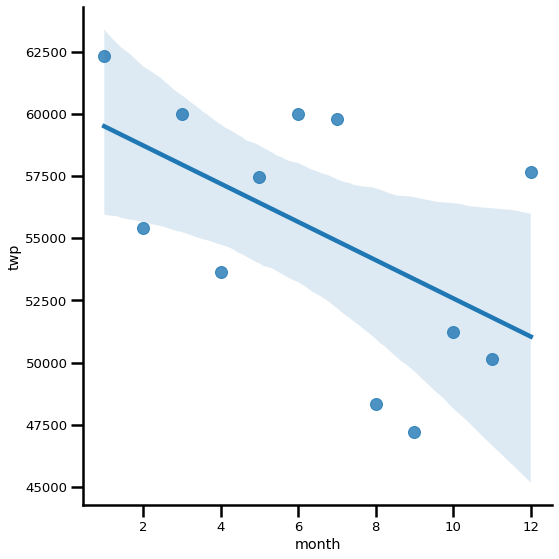

In [89]:
sns.lmplot(x='month',y = 'twp',data = byMonth,size =8)

In [90]:
#aggregation of all calls by day of week and hour into a table -'x'
x = df.groupby(['hour','day of week']).count().unstack(0)['lat']

In [91]:
x

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Mon,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Sat,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sun,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thu,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tue,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wed,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


<AxesSubplot:xlabel='hour', ylabel='day of week'>

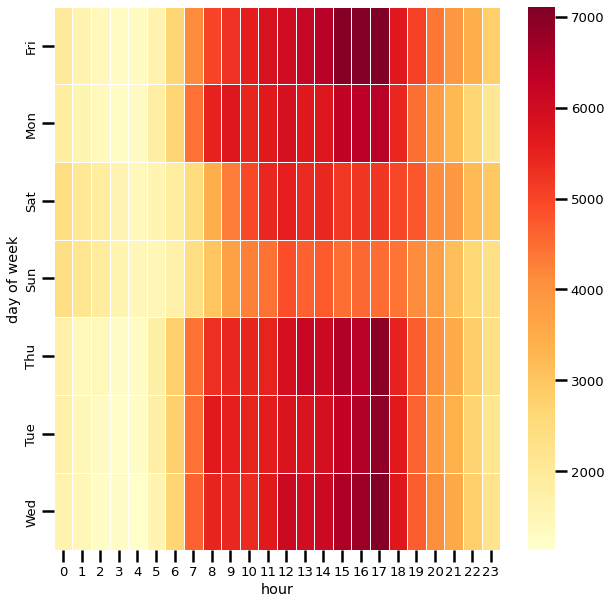

In [92]:
#heatmap and clustermap of 'x'
plt.figure(figsize=(10,10))
sns.heatmap(x, lw=1,linecolor= 'white',cmap = 'YlOrRd')


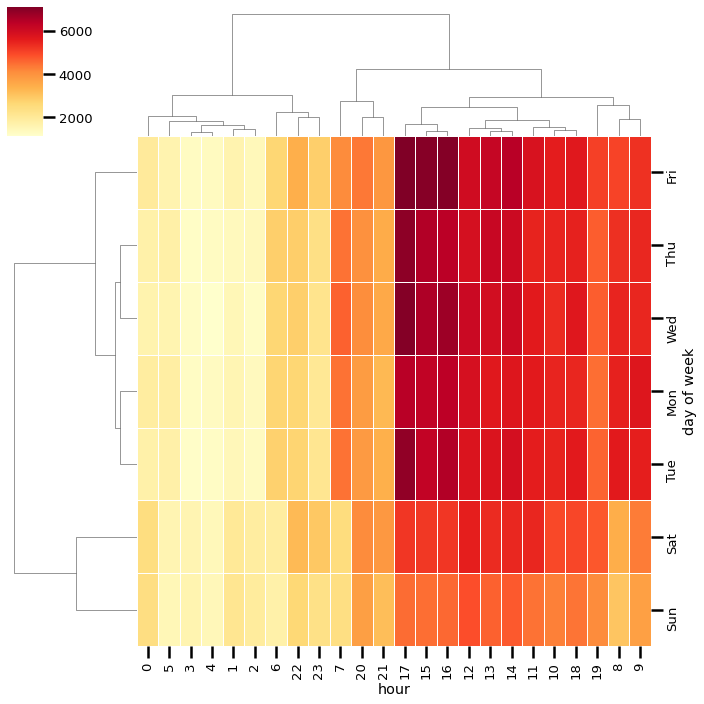

In [93]:
sns.clustermap(x, lw=1,linecolor= 'white',cmap = 'YlOrRd')


<AxesSubplot:xlabel='hour', ylabel='day of week'>

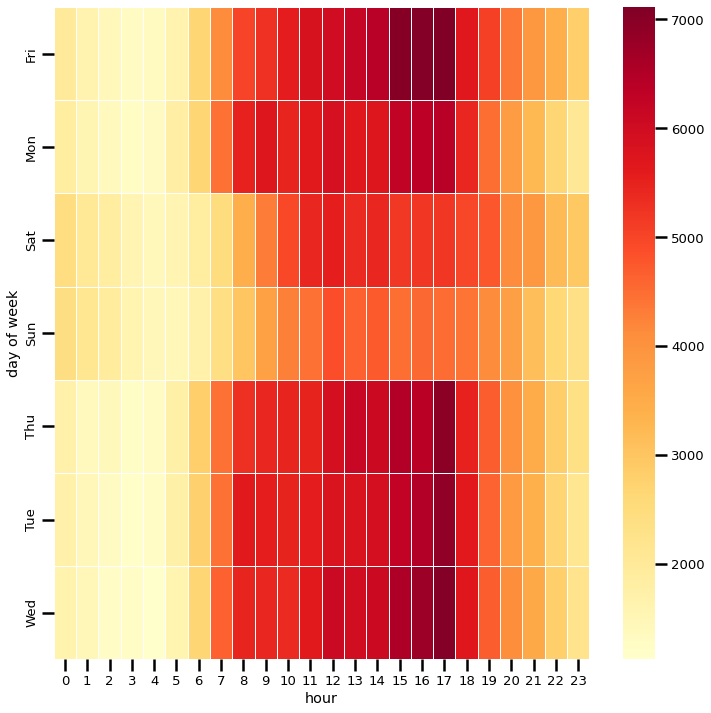

In [94]:
#same process for day of week and month
y = df.groupby(['month','day of week']).count().unstack(0)['lat']
plt.figure(figsize=(12,12))
sns.heatmap(x, lw=1,linecolor= 'white',cmap = 'YlOrRd')


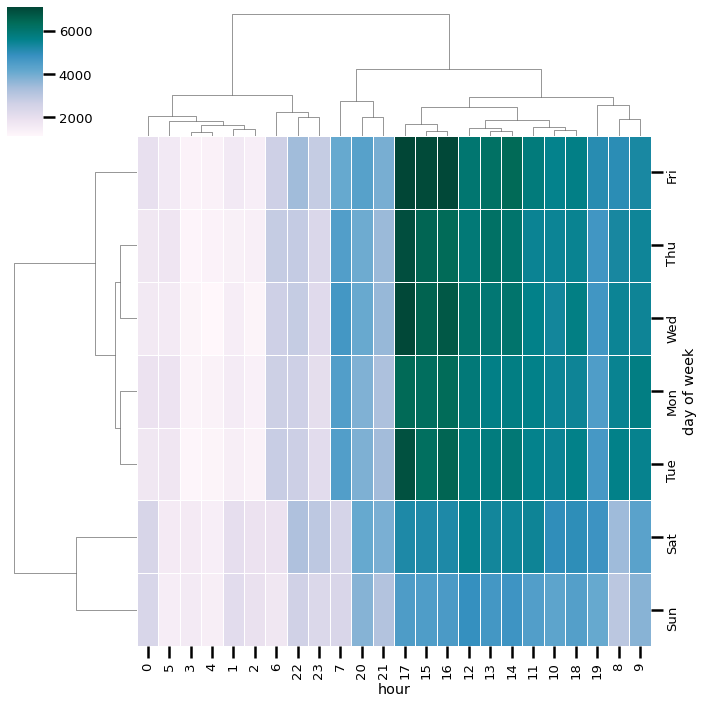

In [95]:
sns.clustermap(x,lw=1,linecolor= 'white',cmap = 'PuBuGn') #failed beacuse NANs


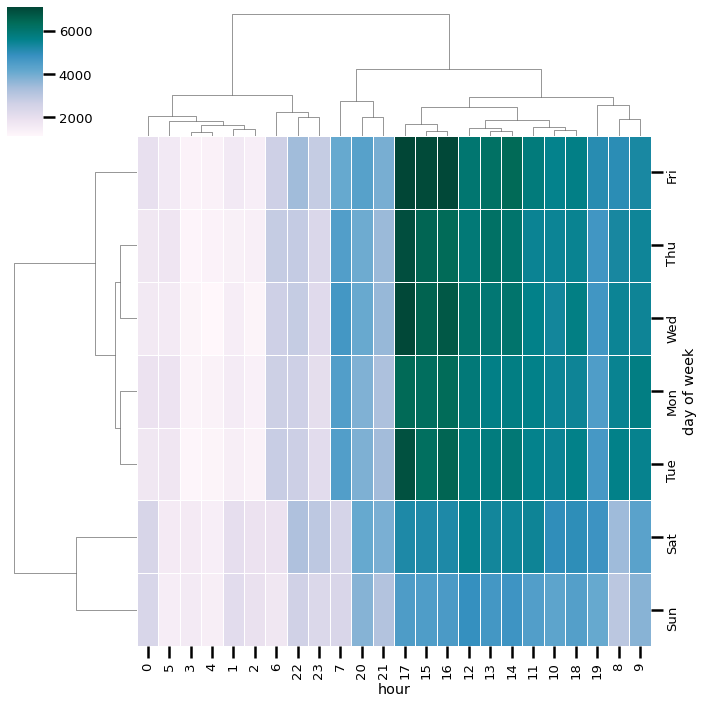

In [96]:
#filling nans with mean
y[8].fillna(value = y[8].mean(),inplace = True)
y[12].fillna(value = y[12].mean(),inplace = True)
#run again
sns.clustermap(x,lw=1,linecolor= 'white',cmap = 'PuBuGn')

